In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.svm import SVC

rseed = 517398857

pd.options.plotting.backend = "plotly"

os.environ["PATH"] += os.pathsep + "C:\\Users\\felipemiotto-ieg\\windows_10_msbuild_Release_graphviz-11.0.0-win32\\Graphviz\\bin"

df = pd.read_excel("Pesquisa clientes tropicálias.xlsx")

display(df.head(5))

,Qual é seu nome completo?,Qual é seu genero?,Qual é a sua idade?,Qual é a média da sua renda familiar mensal?,Qual estado você mora?,Qual cidade você mora?,Você usa muitos eletrônicos durante o dia? (6h ou mais),Qual grau de educação você tem?,Você pratica esportes? (pelo menos 3 vezes na semana),"Você frequenta muito espaços públicos? (parques, museus e etc)",Você gosta de arte?
0,Elizabete Silva,Feminino,43,Maior que R$ 2400 e menor que R$4000,SP,Barueri,v,Ensino médio,f,v,um pouco
1,rodrigo sotano almeida davila,Masculino,38,Maior que R$15000,SP,Barueri,v,Pós graduação,f,v,sim
2,Matilde de Bona Santana Brandão,Feminino,53,Maior que R$4000 e menor que R$6500,SP,Barueri,v,Ensino médio,v,v,um pouco
3,Bruna dias,Feminino,28,Maior que R$8500 e menor que R$11000,SP,Barueri,v,Pós graduação,v,f,um pouco
4,eduardo moraes de paula,Masculino,16,Menor ou igual à R$2400,SP,Barueri,v,Ensino médio,f,f,não


In [36]:
df = df.drop(["Qual é seu nome completo?","Qual cidade você mora?"],axis=1)


df['Você gosta de arte?'] = df['Você gosta de arte?'].replace(to_replace='um pouco',value='nao')
df['Você gosta de arte?'] = df['Você gosta de arte?'].replace(to_replace='não',value='nao')
df = df.sort_values(by='Você gosta de arte?', ascending=False)


y = pd.DataFrame(df["Você gosta de arte?"])
atributos = df.drop(["Você gosta de arte?"],axis=1)

preprocessador = ColumnTransformer(
    transformers=[
        ('ordinal_encoder', OrdinalEncoder(), make_column_selector(dtype_include=['object','bool']))
    ],
    remainder='passthrough',
    verbose_feature_names_out= False
)

pipeline = Pipeline([
    ('OrdinalEncoder', preprocessador),
    ('MinMaxScaler', MinMaxScaler()),
    ('pca', PCA(n_components=None))
])

In [37]:
lb = LabelEncoder()

y = lb.fit_transform(y)
display(y)

x = pd.DataFrame(pipeline.fit_transform(atributos),columns=pipeline.get_feature_names_out())


#após usar o ordinal encoder a ordem das colunas é alterada
#voltando para a ordem antiga
# colunas_originais = atributos.columns
# x = x[colunas_originais]
# display(x.head(5))

#aplicando tecnicas de oversampling
smote = SMOTE()
x, y = smote.fit_resample(x,y)

display(x.head(5))

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.2, random_state=rseed)

c:\Users\felipemiotto-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7
0,0.078653,-0.634631,0.407303,-0.149113,-0.133008,-0.128959,0.086485,0.012880
1,0.106362,0.794014,0.359202,-0.088883,0.413059,0.352136,0.019889,-0.252469
2,0.091263,-0.677471,-0.077097,0.206229,0.363251,0.366604,0.112735,-0.013278
3,-0.713432,-0.008970,-0.209414,0.126965,0.166070,-0.291391,0.215772,0.459852
4,0.044421,0.724223,-0.317142,0.293699,0.057681,0.169636,0.126900,0.033318


In [38]:
parametros = {
    'C': 1.3,
    'gamma': 'scale', 
    'kernel': 'sigmoid', 
    'probability': True, 
    'shrinking': True
}


svc = SVC(**parametros)

In [39]:
svc.fit(x_treino, y_treino)

previsao = svc.predict(x_teste)
print(classification_report(y_teste,previsao))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69        15
           1       0.82      0.75      0.78        24

    accuracy                           0.74        39
   macro avg       0.73      0.74      0.74        39
weighted avg       0.75      0.74      0.75        39



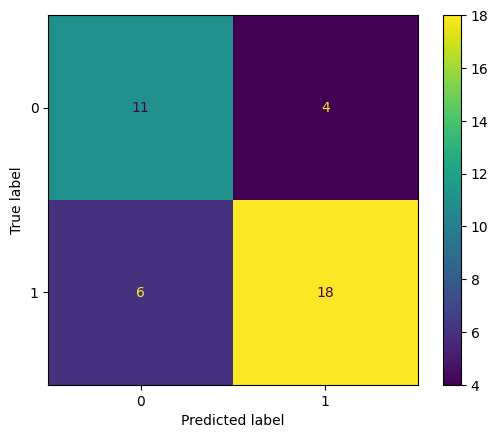

In [40]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_teste, previsao), display_labels = [0, 1])
cm_display.plot()
plt.show()

roc_auc_score em SVC:  0.7416666666666667


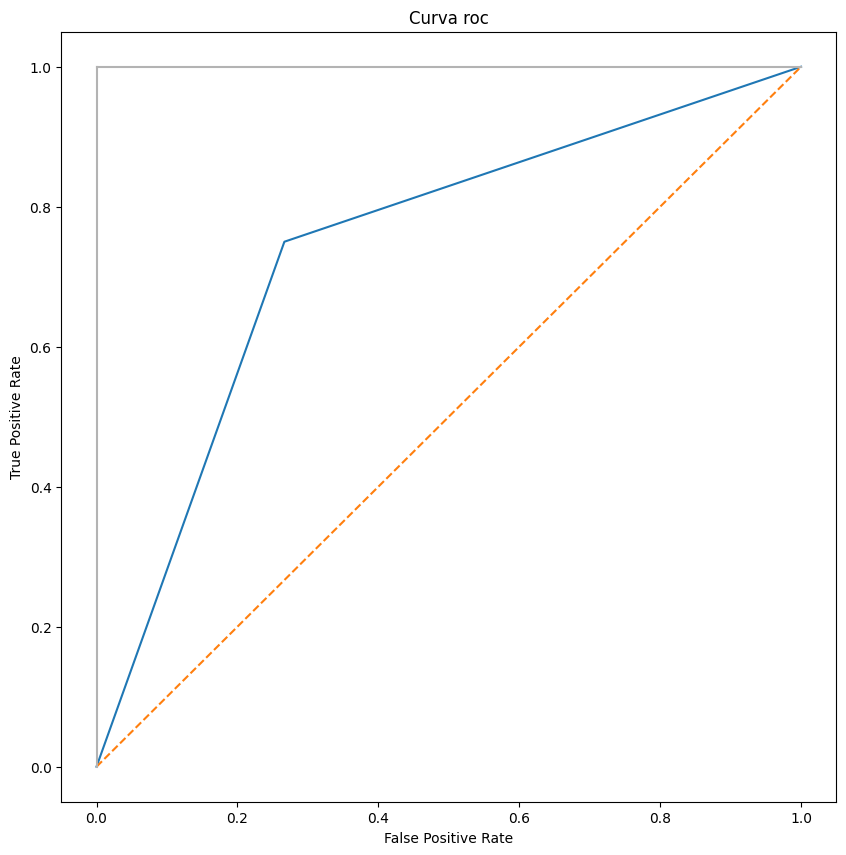

In [41]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_teste, previsao)
print('roc_auc_score em SVC: ', roc_auc_score(y_teste, previsao))
plt.subplots(1, figsize=(10,10))
plt.title('Curva roc')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [43]:
import pickle

with open('tratamento_dados.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

with open('modelo.pkl', 'wb') as f:
    pickle.dump(svc, f)

In [45]:
display(atributos.columns)
display(atributos.head(5))

Index(['Qual é seu genero?', 'Qual é a sua idade?',
       'Qual é a média da sua renda familiar mensal?',
       'Qual estado você mora?',
       'Você usa muitos eletrônicos durante o dia? (6h ou mais)',
       'Qual grau de educação você tem?',
       'Você pratica esportes? (pelo menos 3 vezes na semana)',
       'Você frequenta muito espaços públicos? (parques, museus e etc)'],
      dtype='object')

,Qual é seu genero?,Qual é a sua idade?,Qual é a média da sua renda familiar mensal?,Qual estado você mora?,Você usa muitos eletrônicos durante o dia? (6h ou mais),Qual grau de educação você tem?,Você pratica esportes? (pelo menos 3 vezes na semana),"Você frequenta muito espaços públicos? (parques, museus e etc)"
58,Feminino,30,Maior que R$8500 e menor que R$11000,SP,v,Ensino superior,f,v
146,Masculino,15,Maior que R$8500 e menor que R$11000,SP,v,fundamental,v,f
81,Masculino,27,Maior que R$11000 e menor que R$15000,SP,v,Pós graduação,f,v
80,Feminino,74,Maior que R$11000 e menor que R$15000,SP,v,Ensino superior,f,f
77,Masculino,33,Maior que R$11000 e menor que R$15000,SP,v,Ensino superior,v,f
